In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Iron Hack\Final Project\uber.csv\uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [47]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [48]:
# Drop some nulls
data = data.dropna()

# Check for duplicates
data = data.drop_duplicates()

In [49]:
# Convert 'key' column to datetime
data['key'] = pd.to_datetime(data['key'], errors='coerce')

# Check if the conversion was successful
data['key']

# Split 'key' into components
data['key_day'] = data['key'].dt.day
data['key_month'] = data['key'].dt.month
data['key_year'] = data['key'].dt.year
data['key_hour'] = data['key'].dt.hour
data['key_minute'] = data['key'].dt.minute

# Display the resulting DataFrame
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,key_day,key_month,key_year,key_hour,key_minute
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,19,52
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,20,4
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,21,45
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,8,22
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,17,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,28,10,2012,10,49
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,14,3,2014,1,9
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,29,6,2009,0,42
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,20,5,2015,14,56


### Load data and transform to Tableau

In [50]:
# Load the CSV files without assuming an index column
# Update the file paths as needed
data = pd.read_csv(r"C:\Users\HP\Desktop\Iron Hack\Final Project\uber.csv\uber.csv")

In [51]:
# Drop the Unnamed: 0 column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

In [52]:
# Verify that the `key` column exists
if 'key' in data.columns:
    # Convert 'key' column to datetime
    data['key'] = pd.to_datetime(data['key'], errors='coerce')
    
    # Extract datetime components
    data['key_day'] = data['key'].dt.day
    data['key_month'] = data['key'].dt.month
    data['key_year'] = data['key'].dt.year
    data['key_hour'] = data['key'].dt.hour
    data['key_minute'] = data['key'].dt.minute
else:
    print("Error: 'key' column not found in data")

In [53]:
# Verify the structure of the DataFrames
data.head()
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'key_day', 'key_month', 'key_year', 'key_hour',
       'key_minute'],
      dtype='object')

In [54]:
import pandas as pd


# Remove the `Unnamed: 0` column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Ensure the datetime column is in datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract month from datetime
data['month'] = data['pickup_datetime'].dt.month

# Filter data to include only April (4) to September (9)
data = data[(data['month'] >= 4) & (data['month'] <= 9)]

# Define longitude and latitude ranges
longitude_range = (-73.990000, -73.900000)
latitude_range = (40.700000, 40.770000)


# Debugging: Check the range of the current dataset
print(f"Min pickup_longitude: {data['pickup_longitude'].min()}, Max pickup_longitude: {data['pickup_longitude'].max()}")
print(f"Min pickup_latitude: {data['pickup_latitude'].min()}, Max pickup_latitude: {data['pickup_latitude'].max()}")
print(f"Min dropoff_longitude: {data['dropoff_longitude'].min()}, Max dropoff_longitude: {data['dropoff_longitude'].max()}")
print(f"Min dropoff_latitude: {data['dropoff_latitude'].min()}, Max dropoff_latitude: {data['dropoff_latitude'].max()}")


# Filter by pickup longitude and latitude ranges first
data = data[
    (data['pickup_longitude'].between(longitude_range[0], longitude_range[1])) &
    (data['pickup_latitude'].between(latitude_range[0], latitude_range[1]))
]

# Debugging: Check remaining data after first filter
print(f"Rows after pickup filters: {len(data)}")

# Next, filter by dropoff longitude and latitude ranges
data = data[
    (data['dropoff_longitude'].between(longitude_range[0], longitude_range[1])) &
    (data['dropoff_latitude'].between(latitude_range[0], latitude_range[1]))
]

# Debugging: Check remaining data after second filter
print(f"Rows after dropoff filters: {len(data)}")

# Drop the auxiliary column 'month' as it is not needed for visualization
data = data.drop(columns=['month'])

# Save the cleaned data to a new CSV file
filtered_csv_path = 'cleaned_data_aprisept_final.csv'
data.to_csv(filtered_csv_path, index=False)

#print(f"Filtered data saved to {filtered_csv_path}")

Min pickup_longitude: -768.55, Max pickup_longitude: 57.418457
Min pickup_latitude: -74.01551500000001, Max pickup_latitude: 1292.016128
Min dropoff_longitude: -737.9166650000001, Max dropoff_longitude: 1153.5726029999998
Min dropoff_latitude: -881.9855130000001, Max dropoff_latitude: 42.273158
Rows after pickup filters: 43291
Rows after dropoff filters: 21623


In [57]:
# Verify the index and columns
print("Index type:", data.index)
print("Columns in the dataset:", data.columns)

Index type: Index([     4,     10,     14,     16,     35,     37,     44,     60,     79,
           81,
       ...
       199877, 199893, 199899, 199901, 199920, 199954, 199979, 199984, 199993,
       199999],
      dtype='int64', length=21623)
Columns in the dataset: Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'key_day', 'key_month', 'key_year', 'key_hour',
       'key_minute'],
      dtype='object')


Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows of data:                                                     key  fare_amount  \
pickup_datetime                                                        
2014-08-28 17:47:00+00:00 2014-08-28 17:47:00.000000188         16.0   
2015-05-22 17:32:27+00:00 2015-05-22 17:32:27.000000400          6.5   
2010-04-06 22:20:27+00:00 2010-04-06 22:20:27.000000400          6.9   
2011-09-01 09:21:40+00:00 2011-09-01 09:21:40.000000200          4.9   
2009-06-05 05:35:00+00:00 2009-06-05 05:35:00.000000110          8.1   

                           pickup_longitude  pickup_latitude  \
pickup_datetime                                                
2014-08-28 17:47:00+00:00        -73.925023        40.744085   
2015-05-22 17:32:27+00:00        -73.974388        40.746952   
2010-04-06 22:20:27+00:00        -73.973370        40.755193   
2011-09-01 09:21:40+00:00        -73.988908        40.756982   
2009-06-05 05:35:00+0

19:09:25 - cmdstanpy - INFO - Chain [1] start processing
19:09:27 - cmdstanpy - INFO - Chain [1] done processing


           ds         yhat   yhat_lower   yhat_upper
0  2009-04-30  4339.539182  4087.045185  4587.272600
1  2009-05-31  4275.904495  4028.717981  4535.714846
2  2009-06-30  4009.484740  3766.691446  4277.177250
3  2009-07-31  4028.965688  3786.216097  4279.758153
4  2009-08-31  3924.288485  3677.990263  4179.067884
..        ...          ...          ...          ...
76 2015-08-31  3943.821738  3684.822262  4208.063788
77 2015-09-30  4556.925846  4312.438678  4821.350366
78 2015-10-31   111.679857  -144.784195   371.698909
79 2015-11-30    73.690624  -178.213749   328.265284
80 2015-12-31    24.002151  -223.983532   286.670351

[81 rows x 4 columns]


C:\Users\HP\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HP\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


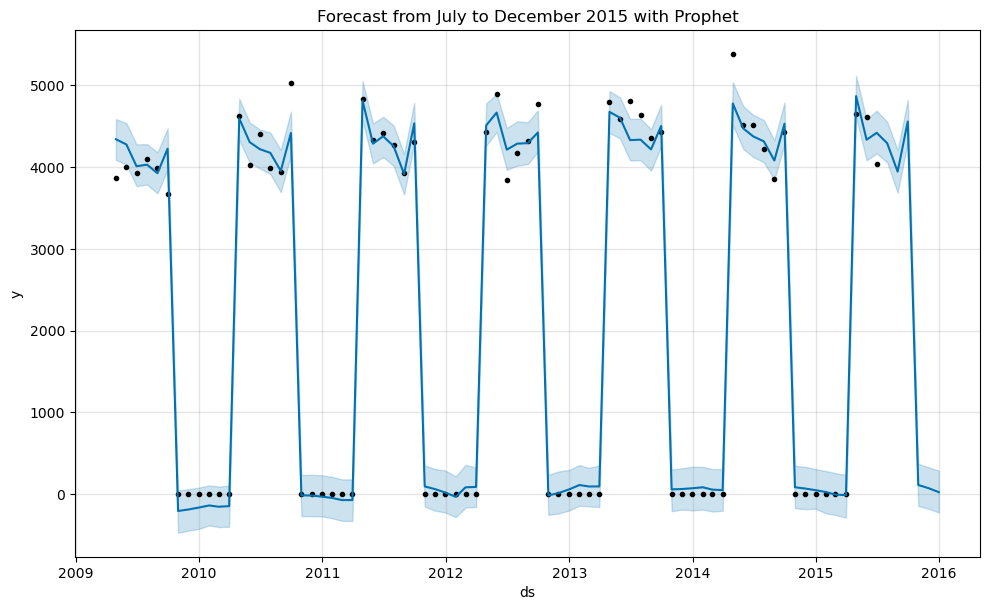

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Set display option to avoid truncation
pd.set_option('display.max_columns', None)

# Ensure the index is datetime
data.index = pd.to_datetime(data.index)

# Verify the index type and first few rows
print("Index type:", type(data.index))
print("First few rows of data:", data.head())

# Select only numeric columns for aggregation
numeric_columns = data.select_dtypes(include='number').columns

# Resample the DataFrame by month and sum the numeric columns
data_monthly = data[numeric_columns].resample('M').sum()

# Verify the resampled data
print("Resampled Data:")
print(data_monthly.head())

# Check the date range for debugging
print("Min date in data:", data_monthly.index.min())
print("Max date in data:", data_monthly.index.max())

# Reformat the data for Prophet
prophet_data = data_monthly.reset_index()

# Remove timezone information from the 'ds' column, if it exists
if 'pickup_datetime' in prophet_data.columns:
    prophet_data['pickup_datetime'] = prophet_data['pickup_datetime'].dt.tz_localize(None)

# Rename columns for Prophet
prophet_data.rename(columns={'pickup_datetime': 'ds', 'fare_amount': 'y'}, inplace=True)

# Verify the data prepared for Prophet
print("Data prepared for Prophet:")
print(prophet_data.head())

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_data)

# Create a DataFrame for future dates (July to December 2015)
future = prophet_model.make_future_dataframe(periods=6, freq='M')

# Predict the future values
prophet_forecast = prophet_model.predict(future)

# Extract the relevant columns from the forecast
forecast_result = prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Print the forecast results
print(forecast_result)

# Plot the forecasted results
fig = prophet_model.plot(prophet_forecast)
plt.title('Forecast from July to December 2015 with Prophet')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HP\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


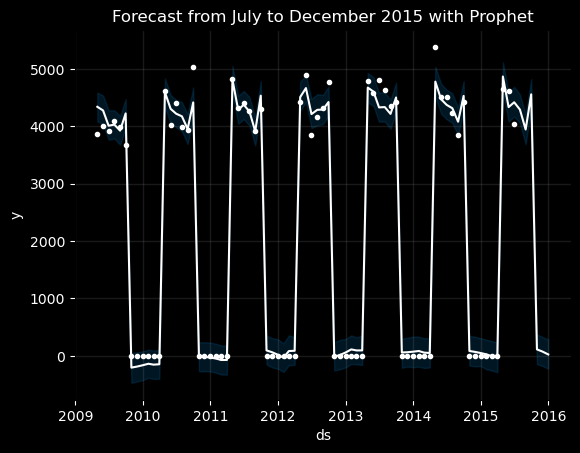

In [75]:
# Customize the plot appearance
fig, ax = plt.subplots(facecolor='black')  # Set the figure face color to black
fig = prophet_model.plot(prophet_forecast, ax=ax)  # Plot on the customized axes

# Set the background color of axes to black
ax.set_facecolor('black')

# Customize the lines and text colors to white
for line in ax.get_lines():
    line.set_color('white')

# Customize text colors individually
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Manually set the color of forecast components (if any) to white
for component in fig.get_children():
    if isinstance(component, plt.Line2D):
        component.set_color('white')

# Show the customized plot
plt.title('Forecast from July to December 2015 with Prophet', color='white')
plt.show()

In [76]:
# Example for customizing the grid (optional)
ax.grid(color='white', linestyle='--')

# Example for customizing the legend (optional)
legend = ax.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows of data:                                                     key  fare_amount  \
pickup_datetime                                                        
2014-08-28 17:47:00+00:00 2014-08-28 17:47:00.000000188         16.0   
2015-05-22 17:32:27+00:00 2015-05-22 17:32:27.000000400          6.5   
2010-04-06 22:20:27+00:00 2010-04-06 22:20:27.000000400          6.9   
2011-09-01 09:21:40+00:00 2011-09-01 09:21:40.000000200          4.9   
2009-06-05 05:35:00+00:00 2009-06-05 05:35:00.000000110          8.1   

                           pickup_longitude  pickup_latitude  \
pickup_datetime                                                
2014-08-28 17:47:00+00:00        -73.925023        40.744085   
2015-05-22 17:32:27+00:00        -73.974388        40.746952   
2010-04-06 22:20:27+00:00        -73.973370        40.755193   
2011-09-01 09:21:40+00:00        -73.988908        40.756982   
2009-06-05 05:35:00+0

20:07:46 - cmdstanpy - INFO - Chain [1] start processing
20:07:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HP\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast from July to December 2015')

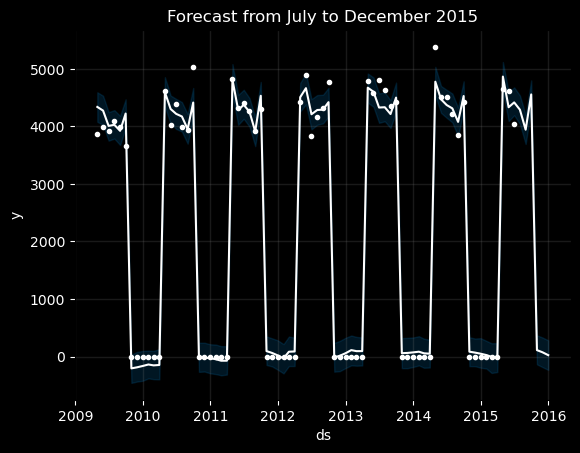

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Ensure the index is datetime
data.index = pd.to_datetime(data.index)

# Verify the index type and first few rows
print("Index type:", type(data.index))
print("First few rows of data:", data.head())

# Select only numeric columns for aggregation
numeric_columns = data.select_dtypes(include='number').columns

# Resample the DataFrame by month and sum the numeric columns
data_monthly = data[numeric_columns].resample('M').sum()

# Verify the resampled data
print("Resampled Data:")
print(data_monthly.head())

# Check the date range for debugging
print("Min date in data:", data_monthly.index.min())
print("Max date in data:", data_monthly.index.max())

# Reformat the data for Prophet
prophet_data = data_monthly.reset_index()

# Remove timezone information from the 'ds' column, if it exists
if 'pickup_datetime' in prophet_data.columns:
    prophet_data['pickup_datetime'] = prophet_data['pickup_datetime'].dt.tz_localize(None)

# Rename columns for Prophet
prophet_data.rename(columns={'pickup_datetime': 'ds', 'fare_amount': 'y'}, inplace=True)

# Verify the data prepared for Prophet
print("Data prepared for Prophet:")
print(prophet_data.head())

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_data)

# Create a DataFrame for future dates (July to December 2015)
future = prophet_model.make_future_dataframe(periods=6, freq='M')

# Predict the future values
prophet_forecast = prophet_model.predict(future)

# Customize the plot appearance
fig, ax = plt.subplots(facecolor='black')  # Set the figure face color to black
fig = prophet_model.plot(prophet_forecast, ax=ax)  # Plot on the customized axes

# Set the background color of axes to black
ax.set_facecolor('black')

# Customize the lines and text colors to white
for line in ax.get_lines():
    line.set_color('white')

# Customize text colors individually
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Manually set the color of forecast components (if any) to white
for component in fig.get_children():
    if isinstance(component, plt.Line2D):
        component.set_color('white')

# Save the customized plot
output_image_path = 'forecast_plot.png'
plt.title('Forecast from July to December 2015')